## K-近邻算法 K-Nearest Neighbors
简单的说，k-近邻算法采用测量不同特征值之间的距离方法进行分类。
即对于输入样本 inX，计算 inX 与训练集中各个样本的距离，然后统计最近 k 个样本的标签，返回占比最多的样本作为结果。

In [3]:
from numpy import *

In [198]:
'''
k-NN 分类器
'''
import operator
import matplotlib.pyplot as plt

# kNN 分类器
def kNNClassifier(inX, dataSet, labels, k):
    m = dataSet.shape[0] # 与 shape(dataSet)[0] 等价。
    # 计算输入样本 inX 与训练集中各个样本之间的距离。
    diffMat = tile(inX, (m, 1)) - dataSet 
    squaredMat = diffMat.A ** 2
    dists = sum(squaredMat, axis = 1)
    sortedDistIndices = dists.argsort() # 使用 argsort 是为了保证与 label 标签保持对应。
    countLabels = {}
    for i in range(k):
        votedLabel = labels[sortedDistIndices[i]]
        countLabels[votedLabel] = countLabels.get(votedLabel, 0) + 1
    sortedCount = sorted(countLabels.items(), key = operator.itemgetter(1), reverse = True)
    return sortedCount[0][0]

# 绘制二维数据。
def plotKnn(dataSet, labels, labelsStr = None ,inX = None, xLabel = None):
    types = len(set(labels)); labelsLen = len(labels)
    typesMat = [[] for i in range(types)]
    for i in range(labelsLen):
        label = labels[i] -1
        typesMat[label].append(dataSet[i])
    
    if not labelsStr:
        labelsStr = []
        for i in range(types):
            labelsStr.append('Label ' + str(i + 1))
    colors = ['c', 'b', 'g']       
    for i in range(types):
        typeMat = mat(typesMat[i])
        plt.scatter(typeMat[:,0], typeMat[:,1], c=colors[i], label = labelsStr[i])
    if (inX):
        plt.scatter(inX[0], inX[1], marker='x', c=colors[xLabel - 1], label = 'The One')
    plt.legend()
    plt.show()
    return

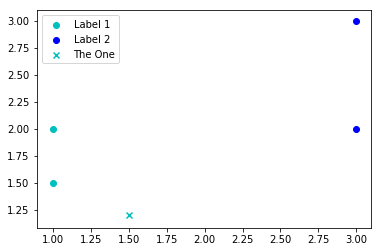

In [199]:
# 测试 k-NN 分类
dataSet = [[1,2],[1,1.5],[3,2],[3,3]]
dataMat = mat(dataSet)
labels = [1,1,2,2]
inX = [1.5,1.2]
xLabel = kNNClassifier(inX, dataMat, labels, 2)
plotKnn(dataSet, labels, None, inX, xLabel)

In [209]:
'''
使用 k-NN 算法改进约会网站效果
'''
import matplotlib.pyplot as plt
def loadDataset(fileName):
    fr = open(fileName)
    fLines = fr.readlines()
    m = len(fLines)
    dataSet = zeros((m, 3))
    labels = []
    index = 0
    for line in fLines:
        lineArr = line.strip().split('\t')
        dataSet[index] = lineArr[0:3]
        labels.append(int(lineArr[3]))
        index += 1
    return dataSet, labels

def plotDatingData(dataSet, dims=[0, 1]):
    plt.scatter(dataSet[:,dims[0]], dataSet[:,dims[1]])
    plt.show()
    return
    

In [202]:
dateDataset, dateLabels = loadDataset('datingTestSet2.txt')
labelsStr = ['largeDoses', 'smallLike', 'didntLike']


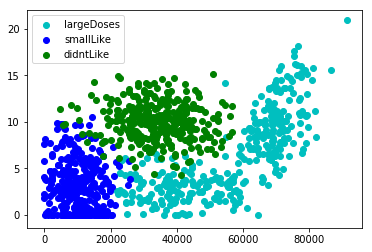

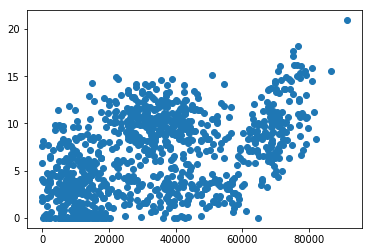

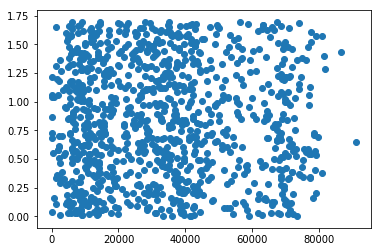

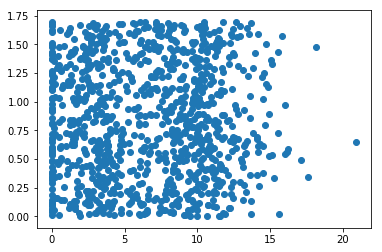

In [212]:
plotKnn(dateDataset,dateLabels,labelsStr)
dateMat1 = [dateDataset[:,0], dateDataset[:,1]]
plotDatingData(dateDataset)
plotDatingData(dateDataset, [0,2])
plotDatingData(dateDataset, [1,2])